In [428]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression,LassoCV,RidgeCV
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,learning_curve,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,confusion_matrix,classification_report,silhouette_score,roc_curve, auc, RocCurveDisplay,recall_score,roc_auc_score,davies_bouldin_score,f1_score,precision_recall_curve
from sklearn.datasets import make_classification,make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree,DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier,IsolationForest,RandomForestRegressor
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial.distance import euclidean,cityblock,cosine
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris,load_digits
from mlxtend.frequent_patterns import apriori,association_rules
from scipy.stats import mode
from sklearn.neighbors import NearestNeighbors
import streamlit as st
import joblib
import warnings
from mpl_toolkits.mplot3d import Axes3D
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from sklearn.utils import resample
warnings.filterwarnings('ignore')

In [430]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Preprocessing and Cleansing

In [433]:
df.shape

(5110, 12)

In [434]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [436]:
df=df.dropna()
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [438]:
df.duplicated().sum()

0

In [440]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [441]:
df.drop(columns=['id'],inplace=True)

In [443]:
plt.style.use('dark_background')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'stroke'}>]], dtype=object)

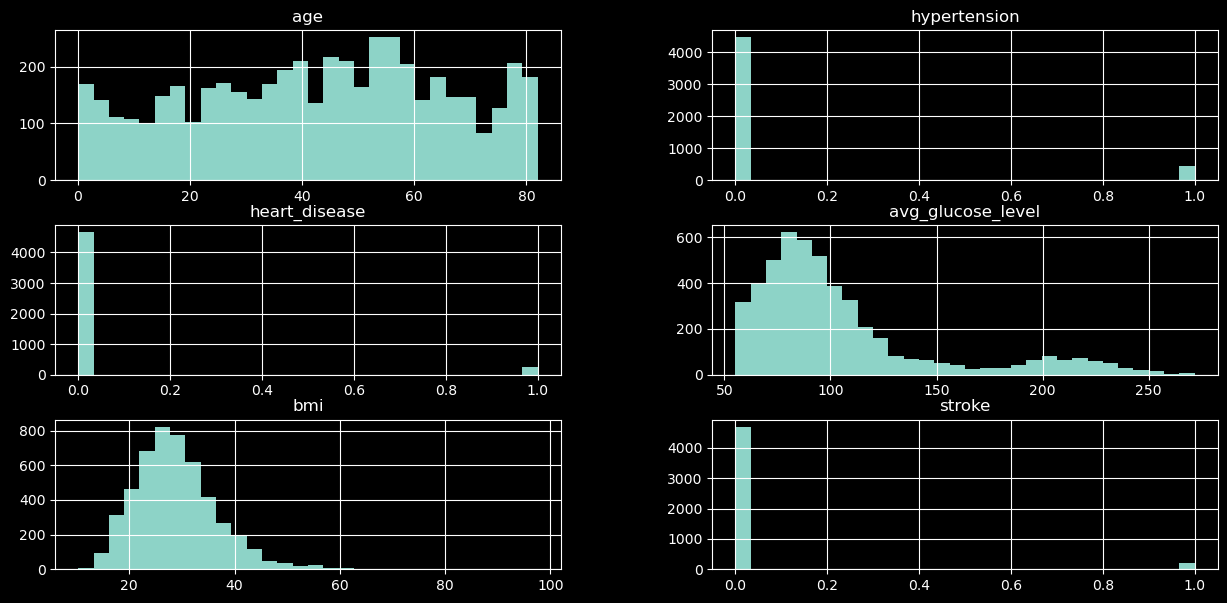

In [444]:
df.hist(bins=30,figsize=(15,7))

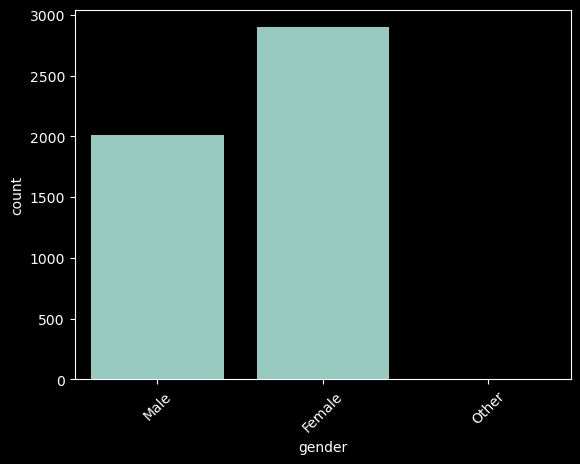

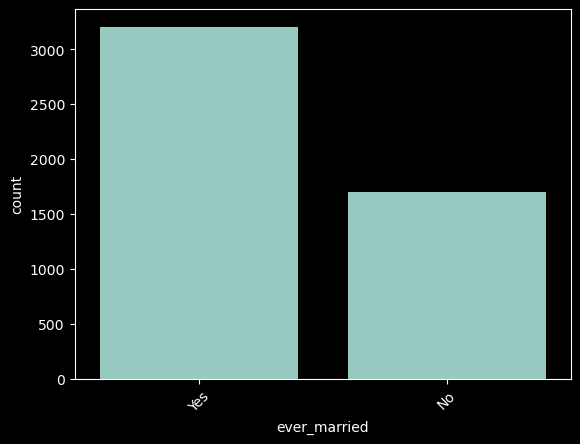

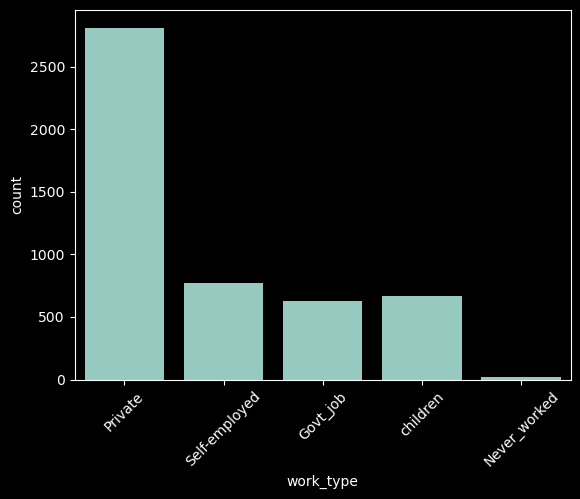

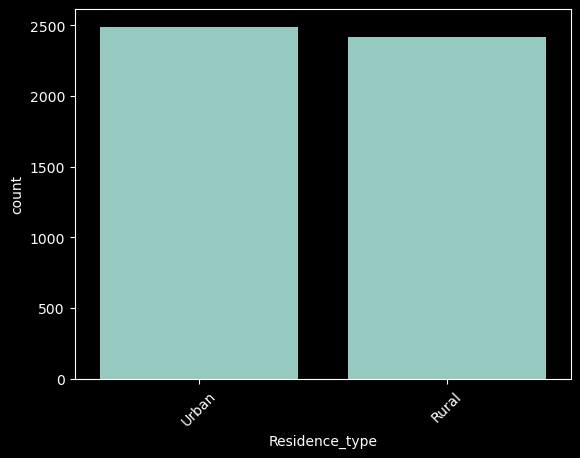

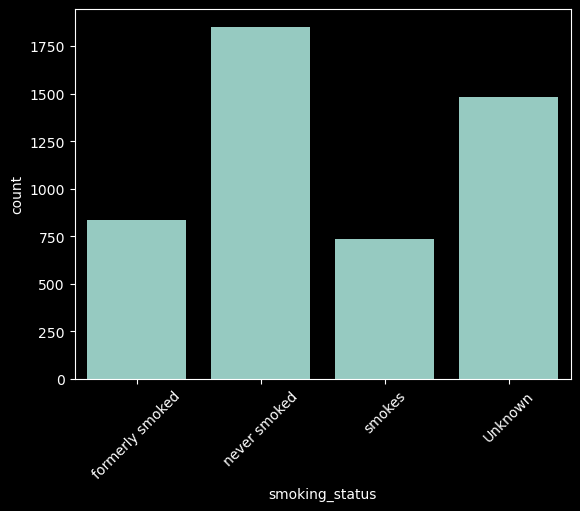

In [447]:
categorical=['gender','ever_married','work_type','Residence_type','smoking_status']
numeric_features = ["age", "avg_glucose_level", "bmi"] 
for col in categorical:
    sns.countplot(x=df[f'{col}'],data=df)
    plt.xticks(rotation=45)
    plt.show()

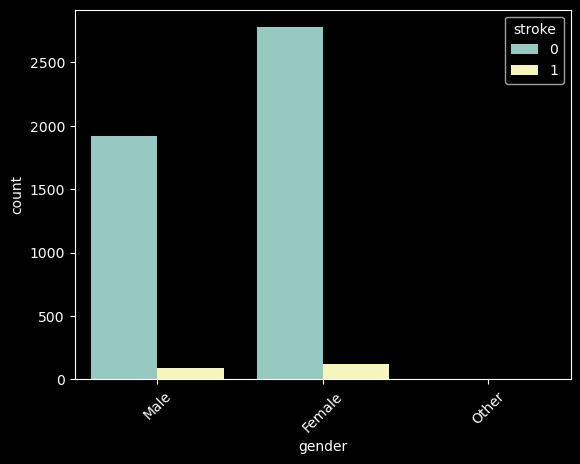

In [449]:
sns.countplot(x='gender',hue='stroke',data=df)
plt.xticks(rotation=45)
plt.show()

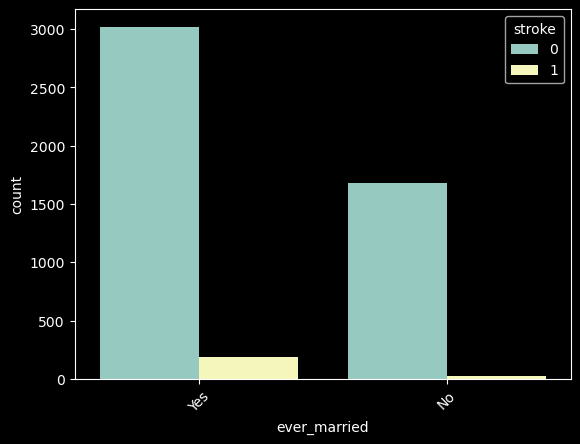

In [450]:
sns.countplot(x='ever_married',hue='stroke',data=df)
plt.xticks(rotation=45)
plt.show()

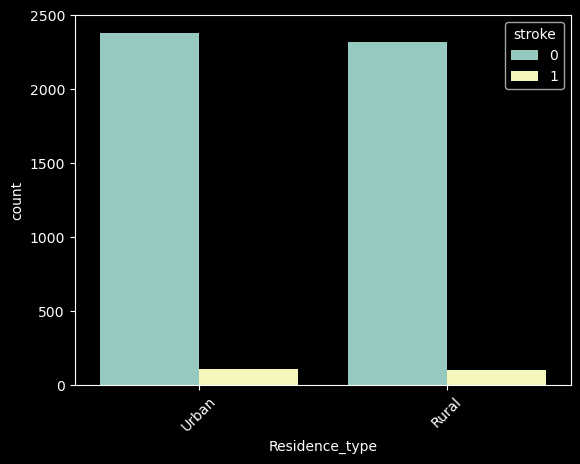

In [451]:
sns.countplot(x='Residence_type',hue='stroke',data=df)
plt.xticks(rotation=45)
plt.show()

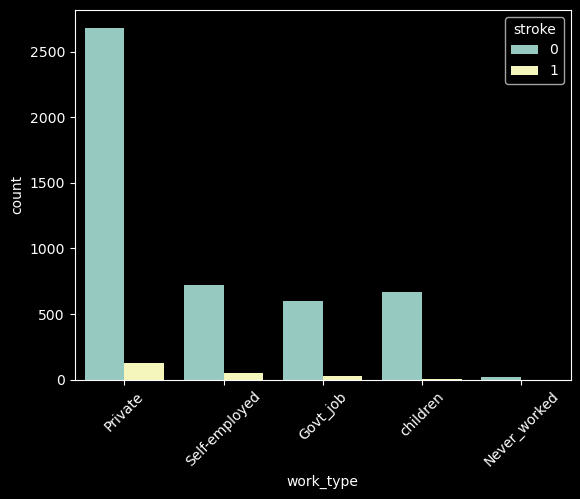

In [452]:
sns.countplot(x='work_type',hue='stroke',data=df)
plt.xticks(rotation=45)
plt.show()

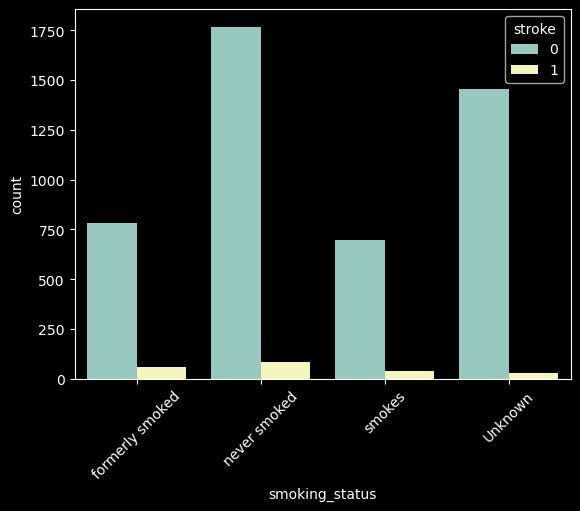

In [453]:
sns.countplot(x='smoking_status',hue='stroke',data=df)
plt.xticks(rotation=45)
plt.show()

In [454]:
df['smoking_status']=df['smoking_status'].replace('Unknown','No Info')

In [455]:
df_linear=df.copy()
df_tree=df.copy()

In [456]:
df_linear['age_hyper']=df_linear['age']*df_linear['hypertension']
df_linear["hyp_hd"] = df_linear["hypertension"] & df_linear["heart_disease"]
df_linear
df_tree['age_hyper']=df_tree['age']*df_tree['hypertension']
df_tree["hyp_hd"] = df_tree["hypertension"] + df_tree["heart_disease"]
df_tree

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_hyper,hyp_hd
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0.0,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0.0,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0.0,0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,79.0,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,No Info,0,0.0,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,0.0,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0.0,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,0.0,0


# Feature Scaling

In [458]:
scaler=StandardScaler()
df_linear[numeric_features]=scaler.fit_transform(df_linear[numeric_features])
df_linear

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_hyper,hyp_hd
0,Male,1.070138,0,1,Yes,Private,Urban,2.777698,0.981345,formerly smoked,1,0.0,0
2,Male,1.646563,0,1,Yes,Private,Rural,0.013842,0.459269,never smoked,1,0.0,0
3,Female,0.272012,0,0,Yes,Private,Urban,1.484132,0.701207,smokes,1,0.0,0
4,Female,1.602222,1,0,Yes,Self-employed,Rural,1.549193,-0.623083,never smoked,1,79.0,0
5,Male,1.690903,0,0,Yes,Private,Urban,1.821368,0.013595,formerly smoked,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,-1.324241,0,0,No,children,Rural,-0.050094,-1.310695,No Info,0,0.0,0
5106,Female,1.690903,0,0,Yes,Self-employed,Urban,0.447882,1.414286,never smoked,0,0.0,0
5107,Female,-0.348753,0,0,Yes,Self-employed,Rural,-0.502369,0.217332,never smoked,0,0.0,0
5108,Male,0.360692,0,0,Yes,Private,Rural,1.372920,-0.419346,formerly smoked,0,0.0,0


# Encoding

In [460]:

le=LabelEncoder()
for col in categorical:
    df_tree[f'{col}']=le.fit_transform(df_tree[f'{col}'])
df_tree

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_hyper,hyp_hd
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1,0.0,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1,0.0,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1,0.0,0
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1,79.0,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0,0.0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0,0.0,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0,0.0,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0,0.0,0


In [461]:
onehot=OneHotEncoder()
df_linear=pd.get_dummies(df_linear,columns=categorical,drop_first=False)
df_linear

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,age_hyper,hyp_hd,gender_Female,gender_Male,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_No Info,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.070138,0,1,2.777698,0.981345,1,0.0,0,False,True,...,False,True,False,False,False,True,False,True,False,False
2,1.646563,0,1,0.013842,0.459269,1,0.0,0,False,True,...,False,True,False,False,True,False,False,False,True,False
3,0.272012,0,0,1.484132,0.701207,1,0.0,0,True,False,...,False,True,False,False,False,True,False,False,False,True
4,1.602222,1,0,1.549193,-0.623083,1,79.0,0,True,False,...,False,False,True,False,True,False,False,False,True,False
5,1.690903,0,0,1.821368,0.013595,1,0.0,0,False,True,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,-1.324241,0,0,-0.050094,-1.310695,0,0.0,0,True,False,...,False,False,False,True,True,False,True,False,False,False
5106,1.690903,0,0,0.447882,1.414286,0,0.0,0,True,False,...,False,False,True,False,False,True,False,False,True,False
5107,-0.348753,0,0,-0.502369,0.217332,0,0.0,0,True,False,...,False,False,True,False,True,False,False,False,True,False
5108,0.360692,0,0,1.372920,-0.419346,0,0.0,0,False,True,...,False,True,False,False,True,False,False,True,False,False


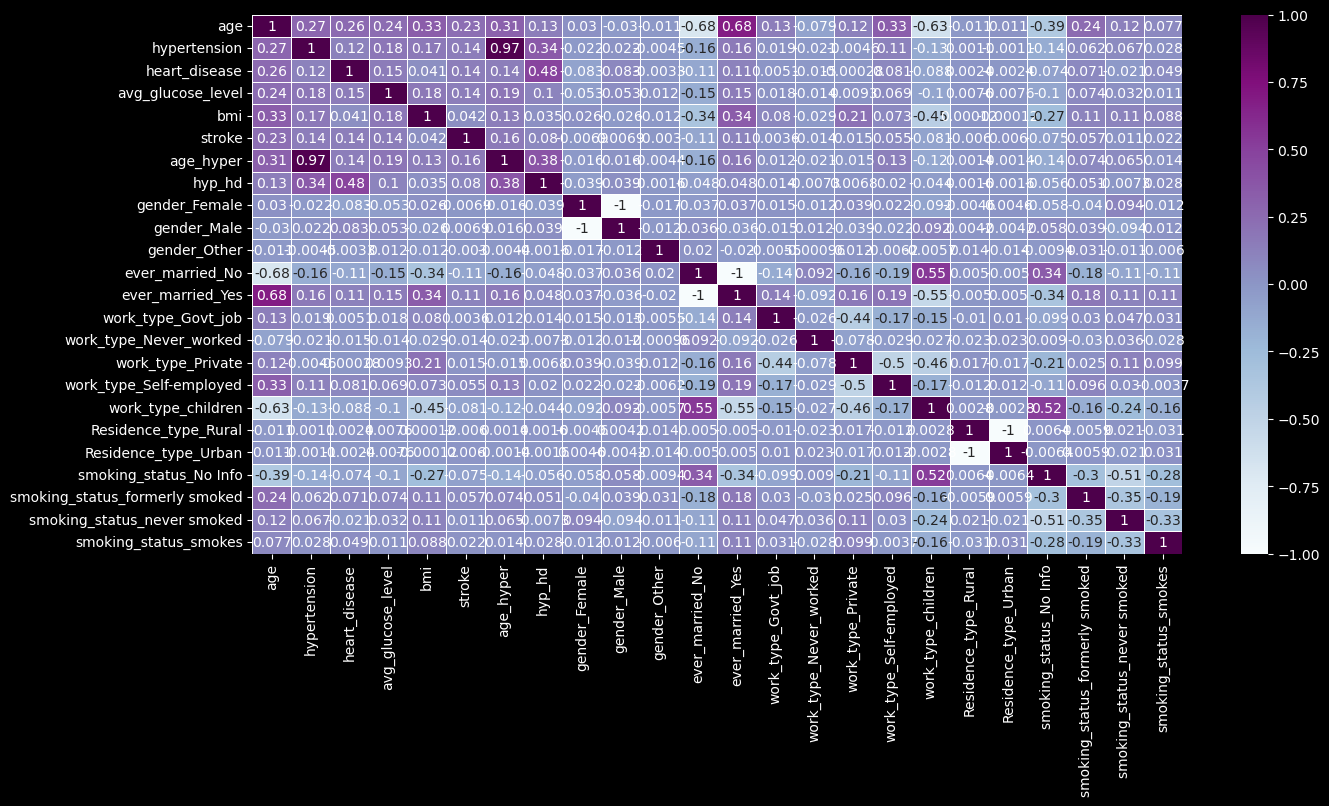

In [462]:
plt.figure(figsize=(15,7))
sns.heatmap(df_linear.corr(),annot=True,cmap='BuPu',linewidths=0.5)
plt.show()

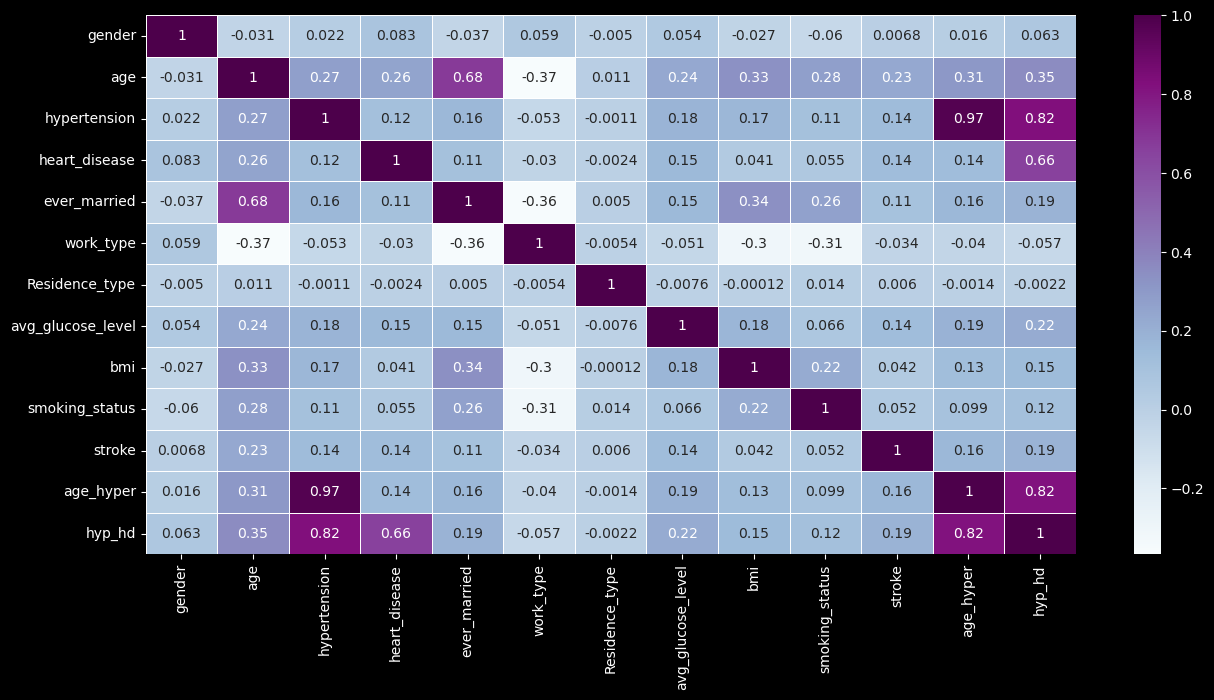

In [463]:
plt.figure(figsize=(15,7))
sns.heatmap(df_tree.corr(),annot=True,cmap='BuPu',linewidths=0.5)
plt.show()

In [464]:
print(df['stroke'].value_counts(normalize=True))

stroke
0    0.957425
1    0.042575
Name: proportion, dtype: float64
